# Glass classification using KNN

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,plot_confusion_matrix,confusion_matrix,plot_precision_recall_curve,plot_roc_curve

In [2]:
data = pd.read_csv("glass.csv")

In [3]:
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


# check Null values

In [4]:
data.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

# check duplicate values

In [5]:
data.duplicated().sum()

1

In [8]:
data=data.drop_duplicates()

In [9]:
data.duplicated().sum()

0

# find correlation

<AxesSubplot:>

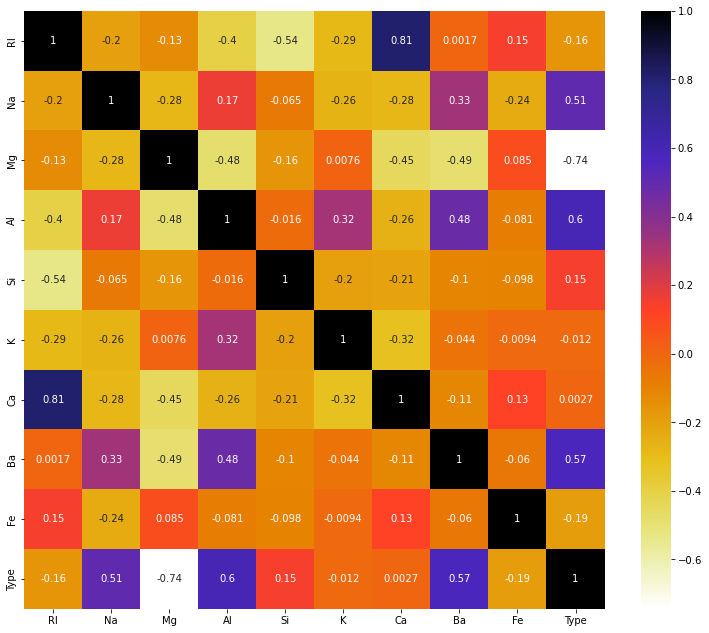

In [10]:
plt.figure(figsize=(13,11))
cor=data.corr()
sns.heatmap(cor,annot=True, cmap=plt.cm.CMRmap_r)

In [11]:
data.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [70]:
data['Type'].value_counts()

2    76
1    69
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

# convert data into dependent and independent variables

In [13]:
X=data.drop(['Type'],axis=1)
y=data['Type']

# split the data into train and test

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

# apply standard scalar

In [16]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# fit the model

In [55]:
classifier = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

# predict the value

In [56]:
y_pred = classifier.predict(X_test)

In [57]:
y_test

197    7
37     1
90     2
167    5
151    3
      ..
155    3
157    3
8      1
41     1
130    2
Name: Type, Length: 64, dtype: int64

In [58]:
y_pred

array([7, 1, 2, 5, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 7, 2, 2, 1, 2, 7, 7,
       7, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 7, 2, 1, 2, 1,
       1, 2, 1, 2, 2, 2, 1, 6, 7, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 5],
      dtype=int64)

# compare predicted and actual values

In [59]:
comparison = pd.DataFrame({'Predicted Values':y_pred,'Actual Values':y_test})

In [60]:
comparison

,Predicted Values,Actual Values
197,7,7
37,1,1
90,2,2
167,5,5
151,1,3
...,...,...
155,1,3
157,1,3
8,1,1
41,1,1


# accuracy of model with k=3

In [65]:
ac = accuracy_score(y_test,y_pred)
ac

0.671875

# confusion matrix

In [63]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[17,  3,  0,  0,  0,  0],
       [ 4, 19,  0,  1,  1,  0],
       [ 5,  3,  0,  0,  0,  0],
       [ 0,  1,  0,  1,  0,  0],
       [ 1,  0,  0,  0,  0,  1],
       [ 1,  0,  0,  0,  0,  6]], dtype=int64)

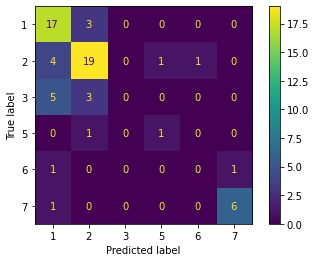

In [64]:
plot_confusion_matrix(classifier,X_test,y_test)